In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
import statistics as stat

# Загружаем датасет(столбца с индексами нет):

In [47]:
import pandas as pd
data = pd.read_table('train.csv', sep=',')

In [48]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


##### Делим датасет на тренировочный и тестовый в соотношении 70 к 30:


In [49]:
critical_temp=data['critical_temp']

In [50]:
from sklearn.model_selection import train_test_split
y= data['critical_temp']
x=data.drop('critical_temp',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, train_size=0.7)

In [51]:
x_train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
8033,5,103.010254,71.228589,76.299908,40.425401,1.386756,1.324852,192.98100,32.219527,66.156352,...,2.800000,2.600000,2.605171,2.415392,1.531778,1.319422,3,0.927273,1.166190,1.153650
20349,3,120.376000,122.999320,120.258556,122.910758,1.097631,0.823755,12.78200,59.207280,5.349551,...,4.333333,4.960000,4.160168,4.842929,1.057905,0.762016,3,2.880000,1.247219,1.057544
538,5,88.936744,51.234714,70.358975,34.914154,1.445824,1.426855,122.90607,16.860640,46.482335,...,2.400000,2.092215,2.352158,2.076196,1.589027,1.269621,1,1.031737,0.489898,0.289330
19565,4,116.974825,110.042047,91.009434,77.431432,1.191312,1.092699,164.13150,52.217850,68.724504,...,4.250000,4.400000,4.119534,4.264809,1.354581,1.187878,3,1.500000,1.089725,1.113553
16059,2,97.064750,91.632852,96.888861,91.609527,0.691336,0.165731,11.68150,84.429468,5.840750,...,5.000000,4.070000,4.898979,4.057170,0.673012,0.203191,2,3.650000,1.000000,0.367560


In [52]:
x_train.shape[0]

14884

In [53]:
x_test.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
8620,4,88.944468,57.882987,66.361592,36.121919,1.181795,0.985847,122.90607,35.346481,51.968828,...,2.250000,2.270000,2.213364,2.231386,1.368922,1.033327,1,1.111429,0.433013,0.443959
14600,4,120.323712,116.866935,117.073229,114.956865,1.358216,1.232573,78.35315,44.319415,29.094332,...,3.500000,3.750000,3.464102,3.722419,1.376055,1.144216,1,1.700000,0.500000,0.433013
21099,3,120.376000,122.765800,120.258556,122.665168,1.097631,0.929163,12.78200,52.318200,5.349551,...,4.333333,4.900000,4.160168,4.760053,1.057905,0.836857,3,2.700000,1.247219,1.135782
6961,5,64.955331,50.757071,47.262758,34.614317,1.352183,1.319550,121.32760,20.519267,45.435657,...,2.000000,2.060606,1.888175,2.040841,1.557113,1.236434,2,1.045455,0.632456,0.295357
19922,4,84.001200,90.939523,53.940120,49.598506,1.004848,0.582345,192.98100,75.346836,75.774052,...,4.750000,4.181818,4.355877,3.765819,1.316302,1.086217,4,1.769091,1.639360,1.695887


In [54]:
x_test.shape[0]

6379

In [55]:
d=x_train

# Проврека на нормальность распределения зависимой величины:

(array([1.0337e+04, 3.3630e+03, 1.6860e+03, 1.6280e+03, 2.9360e+03,
        9.1500e+02, 2.9900e+02, 9.8000e+01, 0.0000e+00, 1.0000e+00]),
 array([2.10000000e-04, 1.85001890e+01, 3.70001680e+01, 5.55001470e+01,
        7.40001260e+01, 9.25001050e+01, 1.11000084e+02, 1.29500063e+02,
        1.48000042e+02, 1.66500021e+02, 1.85000000e+02]),
 <BarContainer object of 10 artists>)

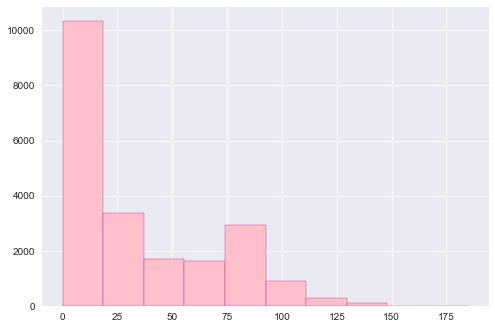

In [56]:
plt.hist(data['critical_temp'], color = 'pink', edgecolor = 'purple')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


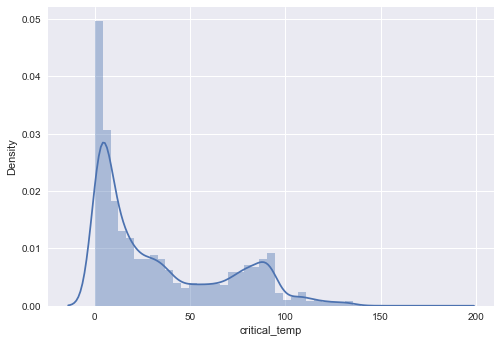

In [57]:
sns_plot = sns.distplot(data['critical_temp'])
fig = sns_plot.get_figure()

# Квантильный график для проверки нормальности р-я зависимой величины:

Text(0.5, 1.0, '"critical_temp" quantile plot')

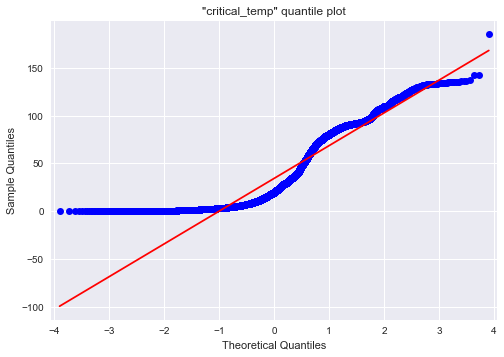

In [58]:
fig = plt.figure()
ax = fig.add_subplot()
sm.qqplot(data['critical_temp'], ax = ax, line='s')
ax.set_title ('"critical_temp" quantile plot')

# "Ящик с усами", ну или японские свечи (определяем статистические выбросы)

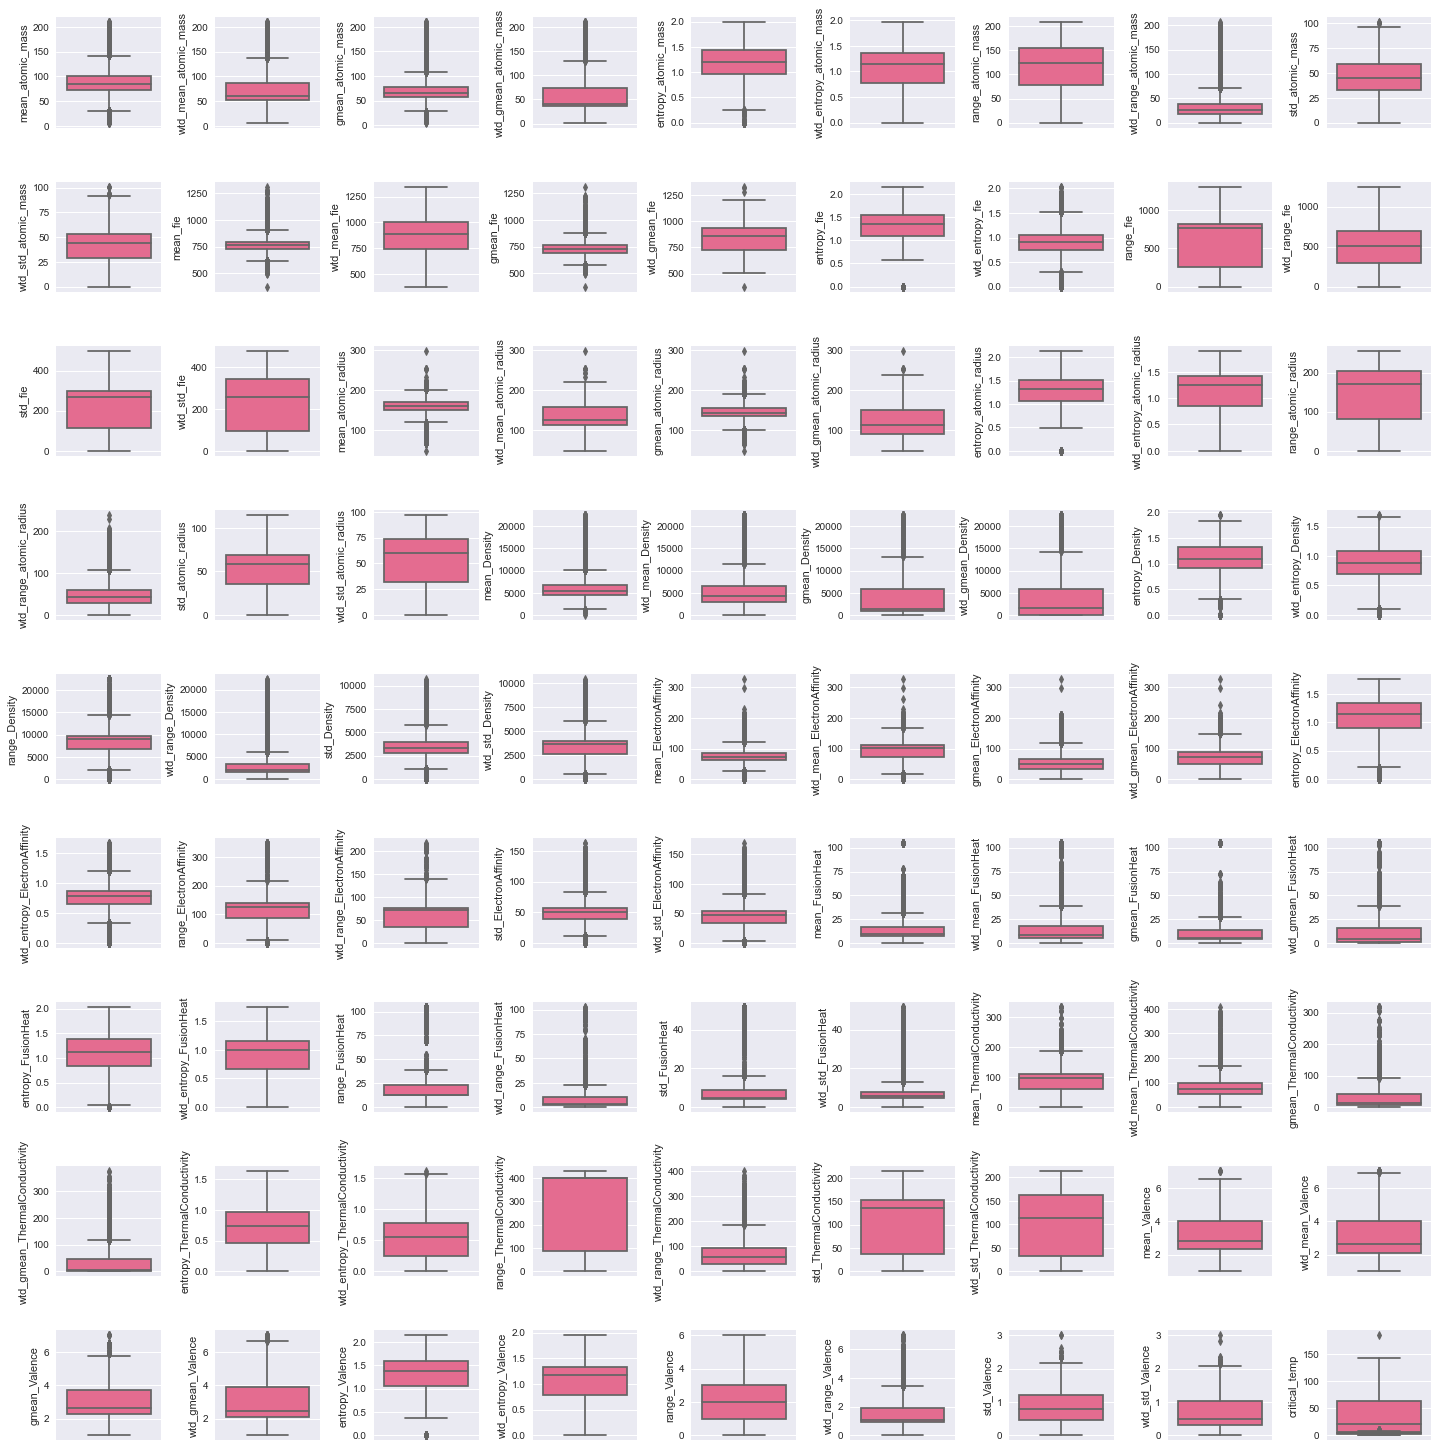

In [16]:
fig, ax = plt.subplots(ncols = 9, nrows = 9, figsize = (20, 20))
index = -1
ax = ax.flatten()

for col, value in data.items():
    colors = ['#F85888']
    sns.boxplot(y=col, data=data, ax=ax[index], palette = colors)
    index +=1 
    plt.tight_layout(pad = 0.8, w_pad=0.5, h_pad=5.0)
    

In [59]:
for column in data:   
    q75 = np.percentile(data[column], 75)
    q25 = np.percentile(data[column], 25)

    q10 = np.percentile(data[column], 10)
    q90 = np.percentile(data[column], 90)

    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[column]<min, column] = q10
    data.loc[data[column]>max, column] = q90

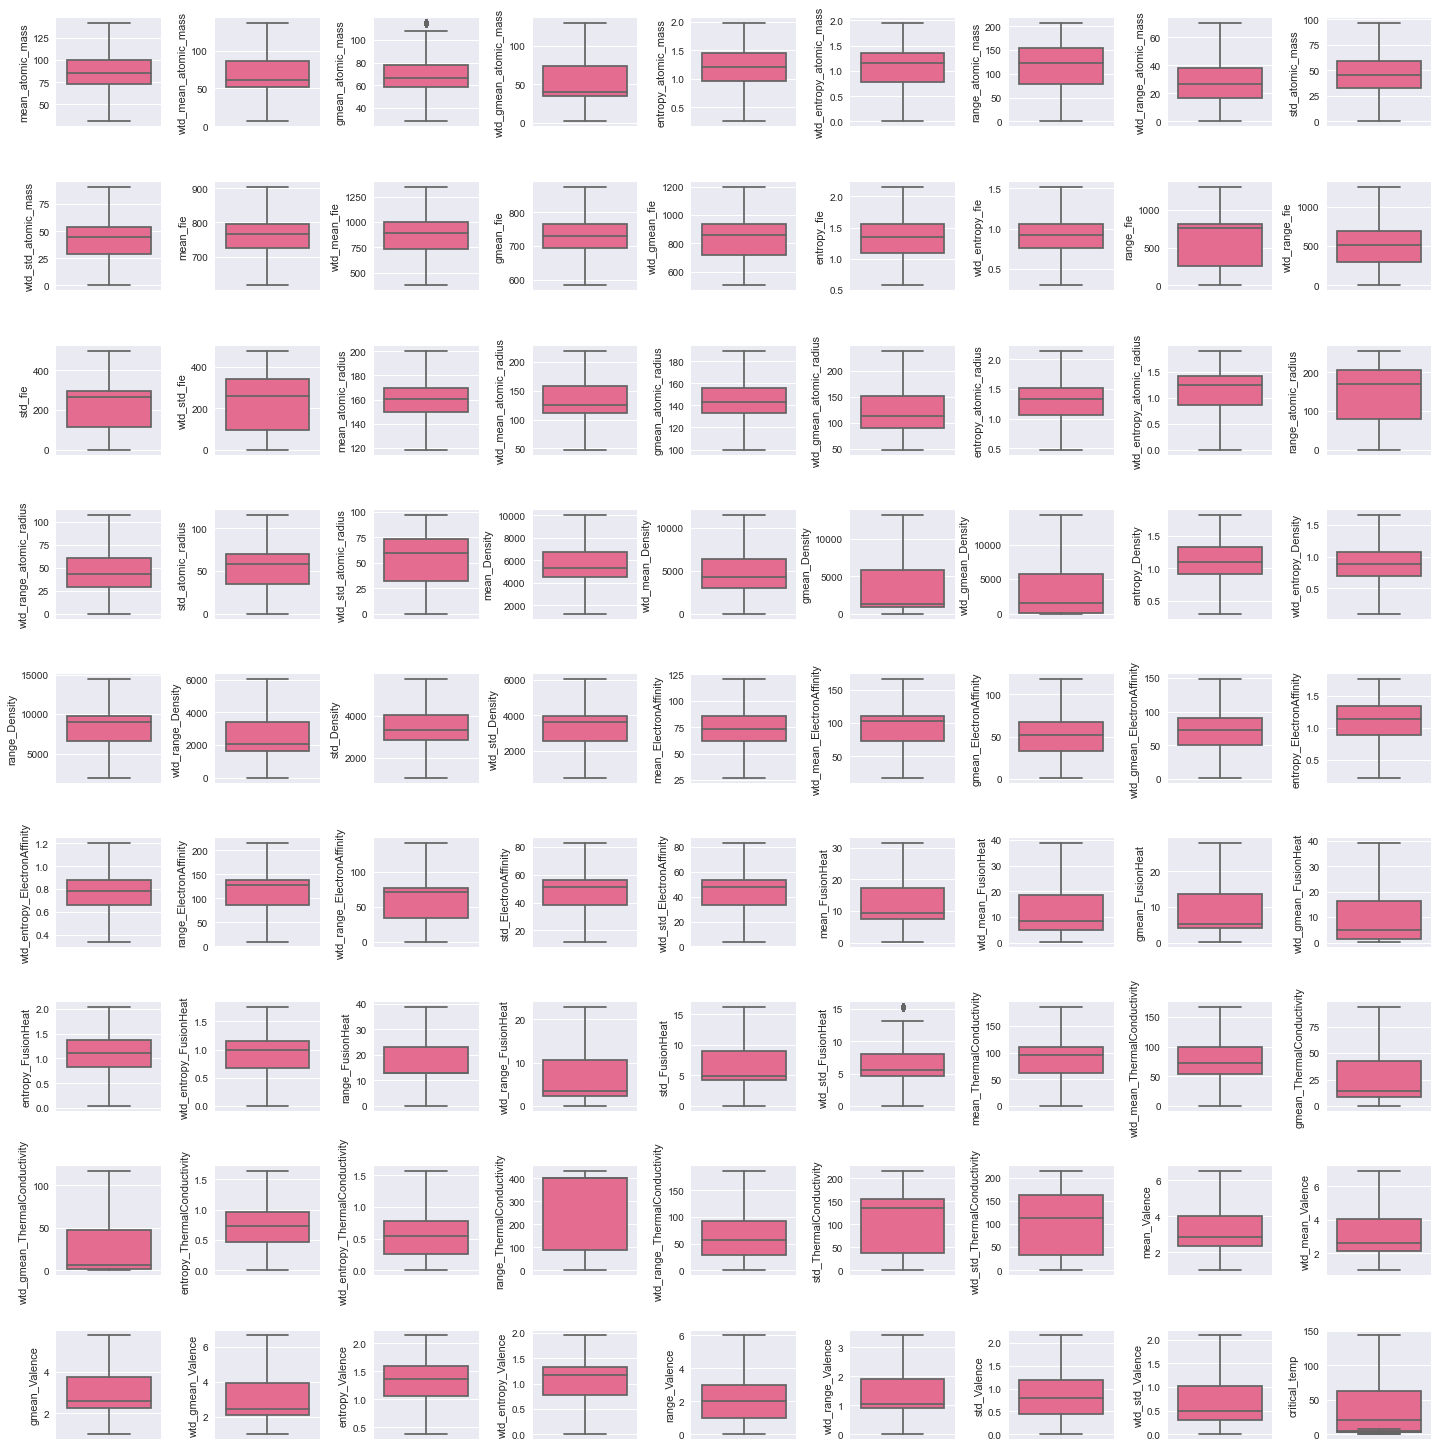

In [18]:
fig, ax = plt.subplots(ncols = 9, nrows = 9, figsize = (20, 20))
index = -1
ax = ax.flatten()

for col, value in data.items():
    colors = ['#F85888']
    sns.boxplot(y=col, data=data, ax=ax[index], palette = colors)
    index +=1 
    plt.tight_layout(pad = 0.8, w_pad=0.5, h_pad=5.0)
    

# Cохраним средние значения и стандартные отклонения, в случае если нам надо будет стандартизировать новые прогнозные данные с небольшим n:

In [60]:
mean_sd=[]

for column in x_train:
    mean_sd.append([stat.mean(x_train[column]), stat.stdev(x_train[column])])

# Неудавшаяся стандартизация руками:

In [61]:
x_train_norm=x_train
for j in range(x_train_norm.shape[1]):
    for i in range(x_train_norm.shape[0]):
        x_train_norm.iloc[i,j]=(x_train_norm.iloc[i, j]-mean_sd[i][0])/mean_sd[i][1]

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


IndexError: list index out of range

# Стандартизация тренировочного набора данных:

In [62]:
x_train_norm = x_train.copy()
  

for column in x_train_norm:
   x_train_norm[column] = (x_train_norm[column] -
                           x_train_norm[column].mean()) / x_train_norm[column].std()    
  
 
display(x_train_norm)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
8033,-2.313077,0.519602,-0.050329,0.160129,-0.491438,0.601411,0.644719,1.416827,-0.034263,1.084272,...,-0.380883,-0.464051,-0.431058,-0.544879,0.595739,0.696540,0.769887,-0.568894,0.671229,1.051419
20349,-4.608628,1.105667,1.496680,1.574705,1.758586,-0.187568,-0.598553,-1.887845,0.967578,-1.950834,...,1.081672,1.509409,1.050868,1.514217,-0.605777,-0.762581,0.769887,1.421063,0.838165,0.840712
538,-4.061170,0.044645,-0.647785,-0.031048,-0.641773,0.762599,0.897798,0.131722,-0.604416,0.102265,...,-0.762419,-0.888666,-0.672182,-0.832594,0.740895,0.566176,-0.839071,-0.462437,-0.722079,-0.843548
19565,-4.152009,0.990883,1.109492,0.633478,0.518008,0.068074,0.068723,0.887756,0.708116,1.212459,...,1.002185,1.041130,1.012144,1.023842,0.146452,0.352198,0.769887,0.014753,0.513693,0.963507
16059,-3.736643,0.318951,0.559390,0.822676,0.904756,-1.296285,-2.231179,-1.908028,1.903876,-1.926316,...,1.717565,0.765180,1.754962,0.847717,-1.581684,-2.225416,-0.034592,2.205743,0.328841,-0.672034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17279,-0.728638,1.550722,2.286009,1.766382,2.253902,-0.341288,-0.471112,-0.140527,1.600491,0.081379,...,0.445778,0.706646,0.475942,0.691485,-0.582490,-0.345116,-0.034592,0.269519,0.211015,0.714550
9915,1.259206,-0.898892,-0.917582,-0.590078,-0.733370,1.415576,1.278392,-0.785222,-0.751350,-0.923819,...,-0.826008,-0.876538,-0.731964,-0.822207,1.205181,0.866739,-0.839071,-0.434361,-0.760179,-0.800957
13401,-0.728638,0.190282,-0.503647,0.154650,-0.154562,-0.743117,-0.110867,0.318318,-0.620648,0.877959,...,1.399619,1.166562,1.509667,1.242262,-0.515843,-0.518365,-0.839071,0.779052,-0.760179,-0.387162
18006,-0.066023,0.507475,0.258353,0.653168,0.490973,0.273731,0.712754,0.378674,-0.731472,0.424256,...,0.763725,0.587904,0.576911,0.461542,0.020982,0.354884,1.574365,0.116659,1.526112,1.494329


# Матрица ковариаций

In [45]:
covmat = np.cov(x_train_norm)
print (covmat)


[[ 0.40298464 -0.41420942  0.40817164 ... -0.61493032 -0.13648957
   0.32629156]
 [-0.41420942  1.0506839  -0.33264225 ...  0.85492312 -0.01335295
  -0.3264211 ]
 [ 0.40817164 -0.33264225  0.55399358 ... -0.72256454 -0.16793205
   0.38596263]
 ...
 [-0.61493032  0.85492312 -0.72256454 ...  2.50290004 -0.29482139
  -0.53711045]
 [-0.13648957 -0.01335295 -0.16793205 ... -0.29482139  1.03242914
  -0.21961238]
 [ 0.32629156 -0.3264211   0.38596263 ... -0.53711045 -0.21961238
   0.36033604]]


# Следующая функция возвращает 2 массива – массив айгензначений и массив айгенвекторов (векторы-столбцы).

In [44]:
np.linalg.eig(covmat)

(array([ 1.13364977e-311+1.13360652e-311j,
         6.95331444e-310+1.37547876e-320j,
         1.32261373e-320            +nanj, ...,
        -3.71914117e-002-8.41780034e-001j,
        -1.64636866e+000+7.67397211e-001j,
        -3.71914117e-002-3.71914117e-002j]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]]))

# Коэффициенты дисперсии(правильное название?) -- Как(насколько)каждый признак объясняет долю дисперсии в данных

In [65]:
pca = PCA()
fit = pca.fit(x_train_norm)
pca.explained_variance_ratio_

array([3.89558516e-01, 1.03720347e-01, 9.58681289e-02, 7.80774931e-02,
       5.89018227e-02, 3.81483018e-02, 3.60604593e-02, 3.07042998e-02,
       2.38597974e-02, 1.95909609e-02, 1.84724926e-02, 1.45476360e-02,
       1.19622881e-02, 9.81758840e-03, 9.76477325e-03, 7.90526555e-03,
       7.23217330e-03, 5.44705997e-03, 4.86502559e-03, 3.82428457e-03,
       3.17357663e-03, 2.86110568e-03, 2.58366492e-03, 2.09183823e-03,
       1.99961814e-03, 1.86891460e-03, 1.76279276e-03, 1.41107187e-03,
       1.26770543e-03, 1.19001114e-03, 1.10402577e-03, 1.01438740e-03,
       9.50394694e-04, 8.95859396e-04, 7.06153112e-04, 6.73434335e-04,
       5.90005469e-04, 5.52438847e-04, 4.55975479e-04, 4.28589084e-04,
       3.90456859e-04, 3.26154884e-04, 2.98375188e-04, 2.39235303e-04,
       2.24948129e-04, 2.22643479e-04, 2.09769902e-04, 1.94196305e-04,
       1.83818140e-04, 1.80507942e-04, 1.63268577e-04, 1.52886437e-04,
       1.29855803e-04, 1.23865210e-04, 1.20262572e-04, 1.06839872e-04,
      

# Компоненты, корреляция

                            PC1       PC2       PC3       PC4       PC5  \
variable                                                                  
number_of_elements    -0.148343 -0.085815  0.077657 -0.054940  0.007509   
mean_atomic_mass       0.053450 -0.226241  0.014841  0.184819  0.044712   
wtd_mean_atomic_mass   0.100201 -0.196499  0.062143  0.149915 -0.025740   
gmean_atomic_mass      0.084321 -0.219791 -0.018257  0.152761  0.003249   
wtd_gmean_atomic_mass  0.120712 -0.182629  0.034810  0.110973 -0.042975   
...                         ...       ...       ...       ...       ...   
wtd_entropy_Valence   -0.155725 -0.077508  0.108532 -0.044182 -0.018408   
range_Valence         -0.025380  0.030289  0.224590  0.021952 -0.140262   
wtd_range_Valence      0.108028 -0.002975  0.044483  0.060991  0.055622   
std_Valence           -0.007199  0.039155  0.208412  0.038259 -0.122833   
wtd_std_Valence        0.004304  0.036243  0.230050  0.023496 -0.165372   

                        

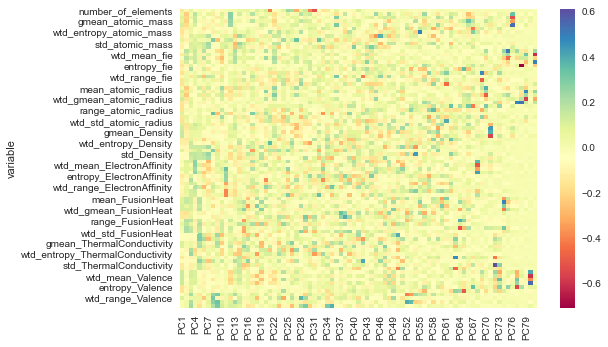

In [103]:
pca_out = PCA().fit(x_train_norm)

# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca_out.explained_variance_ratio_)

# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x_train.columns.values
loadings_df = loadings_df.set_index('variable')
print(loadings_df)


# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs. Except A and B, all other variables have 
# positive projection on first PC.

# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df,cmap='Spectral')
plt.show()

# Судя по графику, нужно выбрать 6-8 (?) компонент:

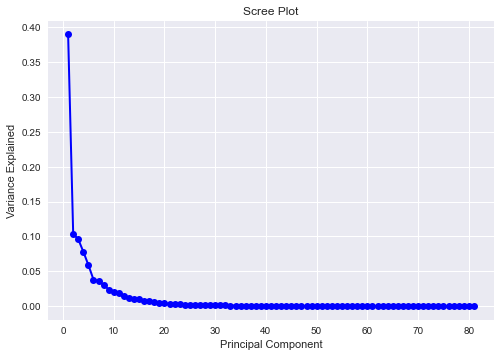

In [78]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Такой же график,наверное более детальный -- лежит в папке:

In [99]:
pca_out.explained_variance_

# get scree plot (for scree or elbow test)
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])

# Здесь строится биплот, но он непонтяный, потому что много компонент, тоже ледит в папке:

In [102]:
# get PC scores
pca_scores = PCA().fit_transform(x_train_norm)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=loadings_df.columns.values, 
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))
    
